In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
import pandas as pd
df = pd.read_csv(
r"C:\\Users\\Lenovo\\Downloads\\AviationData.csv", 
encoding='windows-1252',
dtype={
    6: str, 
    7: str,
    28: str
  }    
)

In [37]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [43]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [45]:
missing_values = df.isnull().sum()
missing_values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [49]:
missing_percentage= (missing_values/ len(df))*100
missing_data = pd.DataFrame({'Missing Values' : missing_values, 'percentage': missing_percentage})
print(missing_data[missing_data['Missing Values']>0])

                        Missing Values  percentage
Location                            52    0.058500
Country                            226    0.254250
Latitude                         54507   61.320298
Longitude                        54516   61.330423
Airport.Code                     38757   43.601570
Airport.Name                     36185   40.708074
Injury.Severity                   1000    1.124999
Aircraft.damage                   3194    3.593246
Aircraft.Category                56602   63.677170
Registration.Number               1382    1.554748
Make                                63    0.070875
Model                               92    0.103500
Amateur.Built                      102    0.114750
Number.of.Engines                 6084    6.844491
Engine.Type                       7096    7.982990
FAR.Description                  56866   63.974170
Schedule                         76307   85.845268
Purpose.of.flight                 6192    6.965991
Air.carrier                    

In [53]:
numerical_columns= df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].median())



In [69]:
data_cleaned =categorical_columns= df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])
print(df.isnull().sum().sum())

0


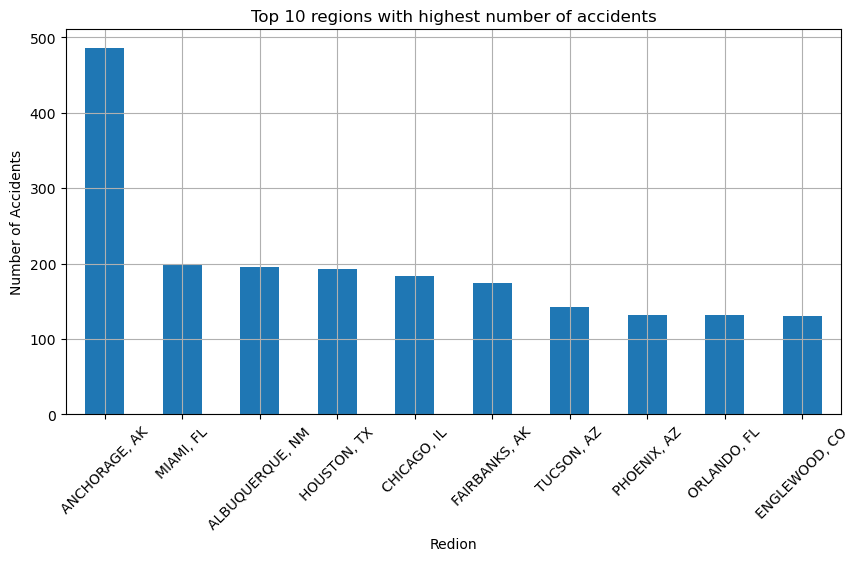

In [57]:
accidents_region = df['Location'].value_counts()[:10]
accidents_region.plot(kind = 'bar', figsize = (10,5))
plt.title('Top 10 regions with highest number of accidents')
plt.xlabel('Redion')
plt.ylabel('Number of Accidents')
plt.xticks(rotation= 45)
plt.grid()
plt.show()


In [61]:
accidents_per_year = df.groupby('Event.Date')['Event.Id'].count()

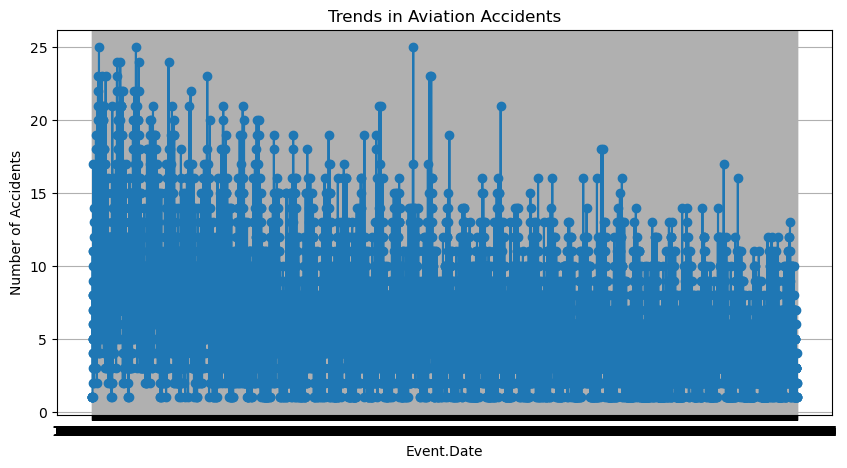

In [67]:
plt.figure(figsize =( 10, 5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker = 'o')
plt.title('Trends in Aviation Accidents')
plt.xlabel('Event.Date')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()

In [ ]:
## Findings
1 Identification of trends in accidents over time
2 Common types of accidents that occur
3 Geographic Locations with the highest accidents

In [ ]:
# Recomendations
#Based on the analysis, here are three recommendations:
#1 Enhance safety protocols - Implement stricter safety protocols for the most common accident types
#2 Targeted training - Provide targeted training sessions for pilots and crew operating in the top accident prone locations
#3 Investment in technology - Invest in advanced technology and safety systems, focusing on the time perionds where accidents are peaking